<a href="https://colab.research.google.com/github/LDankert/ANNs-Tensorflow/blob/verasBranch/IANNwTF_Homework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IANNwTF - Homework 02**

In [478]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## **1. Data Set**

In [479]:
# create a 2D array containing binary digits with all of their possible combinations 
inputs = np.array([
                   [1,1],
                   [1,0],
                   [0,1],
                   [0,0]
                   ])

In [480]:
# create an array of labels per each logical gate
labels_and = np.array([0,0,0,1])
labels_or = np.array([0,1,1,1])
labels_nand = np.array([1,1,1,0])
labels_nor = np.array([1,0,0,0])
labels_xor = np.array([1,0,0,1])

## **2. Perceptron**

In [481]:
class Perceptron():

  def __init__(self, input_units, alpha=1):
    """Initialize weights, input_units - number of weights incoming to a Perceptron, and a learning rate."""
    self.alpha = alpha
    self.sigmoid = self._sigmoid_func
    self.weights = np.random.randn(input_units) 
    self.bias = np.random.randn()

  def _forward_step(self, inputs):
    """Calculate the activation of a Perceptron."""
    self.input = inputs

    self.net_input = np.dot(self.input, self.weights) + self.bias 
    self.activation = self.sigmoid(self.net_input) 
    return self.activation 

  def update(self, delta):
    """Update the parameters of a Perceptron, i.e. the weights and the bias."""
    gradients = delta * self.activation 
    self.weights = self.weights - self.alpha * gradients

  def _sigmoid_func(self, x):
    """Define a sigmoid function."""
    return (1 / (1 + np.exp(-x)))

## **3. MLP**

In [482]:
class MLP(Perceptron):
  """Initialize the number Perceptrons in hidden and output layers."""
  def __init__(self, hidden_layer, output_layer):
    self.hidden_layer = [Perceptron(2) for i in range(4)]
    self.output_layer = Perceptron(4)
    self.sigmoid_prime = self._sigmoid_prime

  def forward_step(self, inputs):
    """Pass the inputs forwards through the network."""
    self.hidden_output = []

    for perceptron in self.hidden_layer:
      self.hidden_output.append(perceptron._forward_step(inputs))

    return self.output_layer._forward_step(self.hidden_output)
  
  def backprop_step(self, inputs, target):
    """Update the parameters of the network."""
    readout_delta = (self.output_layer.activation-target) * self.sigmoid_prime(self.output_layer.net_input)

    for idx, perceptron in enumerate(self.hidden_layer):
      delta = readout_delta * self.output_layer.weights[idx] * self.sigmoid_prime(perceptron.net_input)
      perceptron.update(delta)

    self.output_layer.update(readout_delta)

  def _sigmoid_prime(self, x):
    """Define a derivative of a sigmoid function. """
    return _sigmoid_func(x)*(1-_sigmoid_func(x))

## **4. Training**

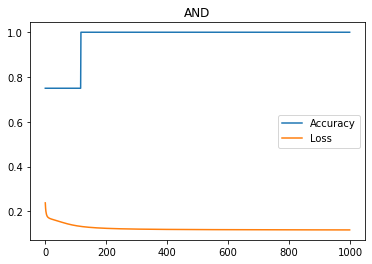

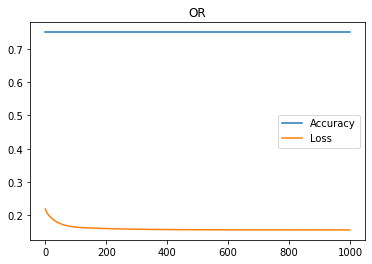

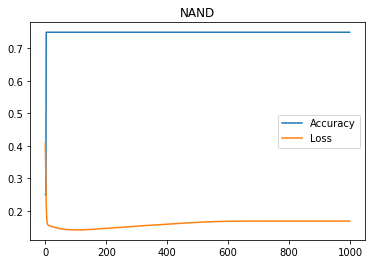

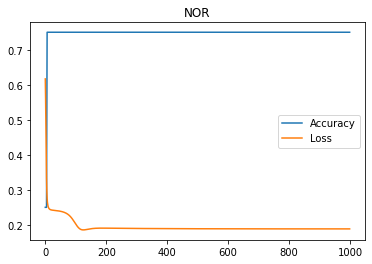

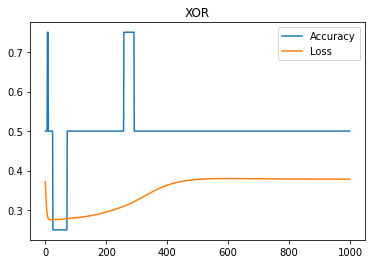

In [483]:
def train_and_evaluate(labels, title):
  mlp = MLP(1,1)

  labels = labels.reshape((4, 1))
  epochs = 1000

  all_losses = []
  all_accs = []

  for epoch in range(epochs):
    losses = 0
    correct = 0 # number of correct predictions in this epoch

    # Iterate through the training samples
    for x1, x2, target in np.concatenate((inputs, labels), axis=1):
      prediction = mlp.forward_step([x1, x2])
      mlp.backprop_step([x1, x2], target)

      # Measure the average of error squares with an MSE - Mean Squared Error
      loss = (prediction-target)**2
      losses += loss

      if round(prediction) == target:
        correct += 1

    # Accuracy = number of correct predictions / total number of samples
    accuracy = correct / len(inputs)

    # Average the loss as well
    loss = losses / len(inputs)

    # Store losses and accuracies for the plot
    all_losses.append(loss)
    all_accs.append(accuracy)

  # Create and show the plot
  x = range(1000)
  plt.plot(x, all_accs, label="Accuracy")
  plt.plot(x, all_losses, label="Loss")
  plt.title(title)
  plt.legend()
  plt.show()

# Train, evaluate and plot for every logical gate
train_and_evaluate(labels_and, "AND")
train_and_evaluate(labels_or, "OR")
train_and_evaluate(labels_nand, "NAND")
train_and_evaluate(labels_nor, "NOR")
train_and_evaluate(labels_xor, "XOR")